PHYS 381 - Computational Physics I - Final Exam

FILE: final_exercise3.ipynb

NAME: David (Scott) Salmon

UCID: 30093320

DATE: 2023-04-17

Note: this code takes my computer between 45 seconds to about a minute to run fully.

Calculated Frequencies are:
	99.954648526Hz
	199.909297052Hz
	399.818594104Hz


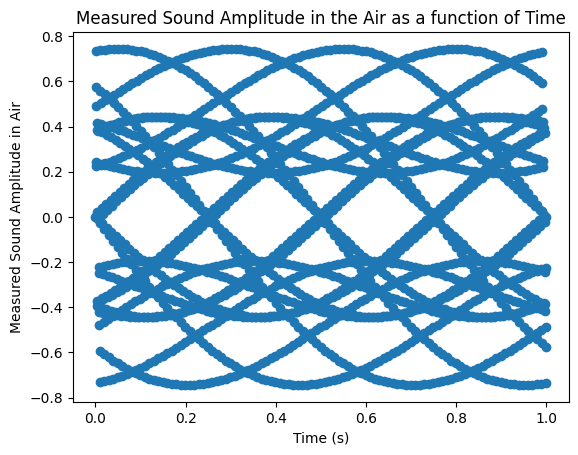

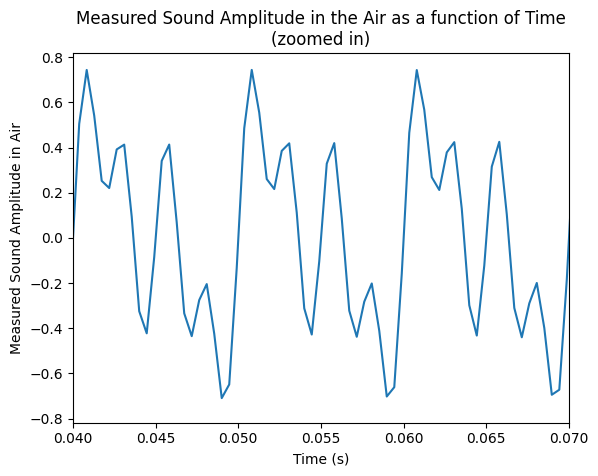

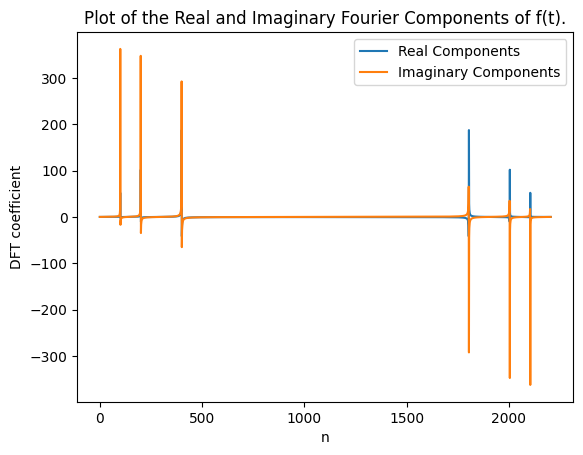

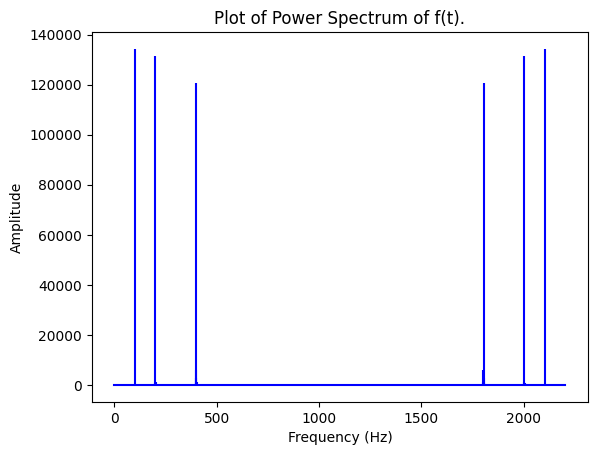

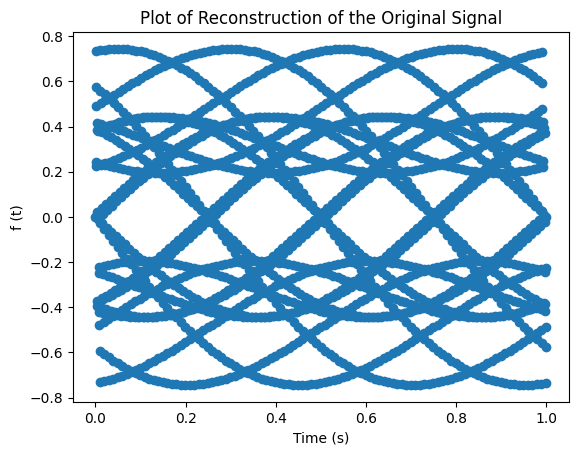

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

#this whole chunk of code is opening the data file and making the data useable in two lists
data_file = open("superposition_signal.txt","r")
data = data_file.read()
data_list = data.split("\n") #making a list by splitting at every new line
t_List = [] #initializing list
sound_List = [] #initializing list
N = len(data_list)-1 #finding N value
i = 0 
while (i<N): #while i is less then number of things in data list, keep looping
    components = data_list[i]
    components = components.split(" ") #splitting at every space to seperate x and y components
    t_List.append(components[0]) #stripping components on each line and assigning them to two lists
    sound_List.append(components[1]) #^^^^
    i = i + 1
t = np.float_(t_List) #converting list of strings to floats
y = np.float_(sound_List) #converting list of strings to floats

#setting parameters and initializing lists
N = len(t) #N amount of data points
h = t[1] #time between each data point, extracted from data file
tau = N * h #generating the "tau" value - this will be used later to calculate frequencies
n = np.arange(0,N+1,1) #creating n and m variables based on the length of input list to be used in for loops
m = np.arange(0,N,1) #^^^
Re_list = [] #initializing real list
Im_list = [] #initializing imaginary list

#information print statements
print("Note: this code takes my computer between 45 seconds to about a minute to run fully.\n")
print("Calculated Frequencies are:")

#this nested loop is creating a list of all the Real and Imaginary components. Using Eq (24) and (25) from lab manual.
for i in n: #iterating each "n" value in Eq(24) and Eq(25) summations
    sum_r = 0
    sum_i = 0
    for j in m: #iterating each "m" value in Eq(24) and Eq(25) summations (per n value)
        Fn =  y[j]*math.cos((2*math.pi*j*i)/N) #Eq (24) summation
        sum_r = sum_r + Fn 
        Fn = y[j]*math.sin((2*math.pi*j*i)/N) #Eq (25) summation
        sum_i = sum_i + Fn
    Re_list.append(sum_r) #adding Re component to Re_list
    Im_list.append(sum_i) #adding Im component to Im_list

    if (i/tau) < 1000: #this if statment is to ensure we only get the "lower" frequencies
        if (sum_r**2 + sum_i**2) > 80000: #if the magnitude of the real and imaginary components is greater then 80 000, then it is one of the dominant frequencies
                print("\t%0.9fHz"%(i/tau)) #prints frequencies

#this function undergoes the "signal reconstruction" process. Using Eq (26) from lab manual
def reconstruction(Re_list, Im_list, m, n):
    signal = []
    for i in m: #iterating each "m" value in Eq(26) summation
        r = 0 #initializing r
        for j in n: #iterating each "n" value in Eq(26) summation (per "m" value)
                r = r + (1/N*(Re_list[j] * math.cos((2*math.pi*j*i)/N) + Im_list[j] * math.sin((2*math.pi*j*i)/N))) #Eq (26) summation
        signal.append(r)
    return(signal)

#using the reconstruction function above, we reconstruct the signal.
r = reconstruction(Re_list, Im_list, m, n)

#this plots the original signal from the data file
plt.figure()
plt.scatter(t,y)
plt.xlabel("Time (s)")
plt.ylabel("Measured Sound Amplitude in Air")
plt.title ("Measured Sound Amplitude in the Air as a function of Time")
plt.show()

#this plots the original signal from the data file, but zoomed in so the finer oscillation patterns can be observed
plt.figure()
plt.plot(t,y)
plt.xlim(0.04,0.07) #this zooms the x-axis in
plt.xlabel("Time (s)")
plt.ylabel("Measured Sound Amplitude in Air")
plt.title ("Measured Sound Amplitude in the Air as a function of Time\n(zoomed in)")
plt.show()

#this plots Real Components vs. n and Imaginary Components vs. n
plt.figure()
plt.plot(n, Re_list)
plt.plot(n, Im_list)
plt.xlabel("n")
plt.ylabel("DFT coefficient")
plt.legend(['Real Components','Imaginary Components'])
plt.title("Plot of the Real and Imaginary Fourier Components of f(t).")
plt.show()

#this plots Power Spectrum of signal
plt.figure()
plt.stem(n/tau, np.asarray(Re_list)**2 + np.asarray(Im_list)**2,'b-', markerfmt=" ", basefmt="-b")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title ("Plot of Power Spectrum of f(t).")

#this plots the reconstructed signal using the calculated real and imaginary fourier components
plt.figure()
plt.scatter(t, r)
plt.xlabel('Time (s)')
plt.ylabel('f (t)')
plt.title ("Plot of Reconstruction of the Original Signal")
plt.show()

### CODE WORKFLOW:

The first bit of the code is all about "opening" the data file and organizing it into lists. I also initialize any lists and/or variables that are required for future calculations. 

The first nested loop is all about calculating all of the "Real" and "Imaginary" fourier components at every time value. These loops are representative of the summations shown in Eq's (24) and (25) of the Assignment 4 manual. The first loop is iterating the "n" variable from those summations while the inner nested loop is iterating the "m" variable from those summations. These creates a nested summation that occurs for every n variable. I also have a "dominant frequency" checking if statement in this loop to determine if the amplitude of the real and imaginary components at every "n" value is larger than an arbitrarily chosen value, 80 000. I chose this number because I noticed on the power spectrum graph (generated later) that all of the dominant frequencies had an amplitude larger then this, so it would be a good value to check. I also filtered out the latter "dominant" frequencies on the power spectrum because they are not relevant as they are reflections of the actual dominant frequencies.

Now that we have all the fourier components, the next major loop is a defined function representing the reconstruction using those components. Again, I used a nested loop to do the nested summation from Eq (26) from the Assignment 4 manual. It iterates for every n value for every m value and does the large Eq(26) for every loop. It then adds the generated signal value to a list.

The final part of the code is all matplotlib functions for the original data file (+ a zoomed in version of the original data file), the real and imaginary fourier components, the power spectrum and the reconstruction plot. Each plot is explained in further detail below.

### PLOT DETAILS AND FINAL RESULTS
The first plot is signal as a function of time. The values here are ripped directly from the data file, and then plotted on a scatter chart. When plotted with the typical "plt.plot" method, the whole chart looks like a bit of a blob, whereas the scatter chart looks much cleaner. The second plot is using the exact same data from the data file, but is zoomed in significantly so the "finer oscillation patterns" can be observed. It is also using plt.plot because when zoomed in this much there is no clutter. The chunk visualized was between time = 0.04 seconds and 0.07 seconds. The original plot is hundred(s) of these oscillations shown in the second plot, indicating that the frequency of the sine waveforms is going to be very large (as is explored down below).

In the third plot titled "Plot of the Real and Imaginary Fourier Components of f(t)", we can see pretty easily that it's the imaginary components that dominates the real components. The orange bars represent the imaginary fourier components whereas the blue bars represent the real fourier components. There are more orange bars and the orange bars also are much larger in magnitude compared to the blue bars.

The third plot is the power spectrum of this signal. This plot is significant because it provides information on the "strength" of each frequency component and can therefore be used to determine the dominant frequencies of the signal. Similar to Assignment 4, because this is a sinusoidal wave(s), the power spectrum "repeats" itself, so the upper bars on the spectrum can be ignored because they are shifted versions of the actual dominant frequencies. We calculated these dominant frequencies by measuring when the magnitude of the real and imaginary components was greater than 80 000, as this will filter out any non-dominant frequencies. When the magnitude is larger then 80 000, the dominant frequency is calculated by dividing i/tau (i.e. the value of "n" that corresponds with the dominant frequency divided by the period time between each oscillation. This produces a frequency value).

The caluclated dominant frequencies are as follows: v1 = 99.95Hz, v2 = 199.91Hz, and v3 = 399.82Hz. This matches up qualitatively with the power spectrum; the 3 bars roughly occur at 100Hz, 200Hz, and 400Hz.

Finally, the signal is then reconstructed using the Fourier Components calculated in the previous steps. As can be seen, it is virtually identical to the original graph, meaning our reconstruction worked!